# Theory Questions & Answers

 ### 1.What is the difference between a function and a method in Python?
 -> Function is a block of reusable code that performs a specific task. It exists independently and can be called by its name. Functions are defined using the def keyword.

Method is a function that is associated with an object and is defined inside a class. It operates on the data of the object it belongs to and can access or modify the object's state.

Key differences:

    1. Methods are called on objects, while functions are called independently.
    2. Methods have access to the object's data (via self parameter).
    3. Methods are associated with a particular class.


In [2]:
#Example of function:

def greet(name):
    return f"Hello, {name}!"

print(greet("Darshil"))  # Calling as independent function


 #Example of method:
class Person:
    def __init__(self, name):
        self.name = name
    
    def greet(self):  # This is a method
        return f"Hello, my name is {self.name}!"

Darshil = Person("Darshil")
print(Darshil.greet())  # Calling method on an object

Hello, Darshil!
Hello, my name is Darshil!


### 2.Explain the concept of function arguments and parameters in Python.
-> Parameters are the variables listed inside the parentheses in the function definition. They represent the data that the function needs to work with.

Arguments are the actual values passed to the function when it is called.

Types of parameters/arguments:

    1.Positional arguments - matched by position in function call.
    2.Keyword arguments - matched by parameter name.
    3.Default parameters - parameters with default values.
    4.Variable-length arguments (*args and **kwargs) - accept any number of arguments.

In [3]:
# Parameters: a, b, c (with default value), *args, **kwargs
def example(a, b, c = 10, *args, **kwargs):
    print(f"a: {a}, b: {b}, c: {c}")
    print(f"args: {args}")
    print(f"kwargs: {kwargs}")

# Arguments: 1, 2, 3, 4, 5, name = "Alice", age = 25
example(1, 2, 3, 4, 5, name="Alice", age = 25) 

a: 1, b: 2, c: 3
args: (4, 5)
kwargs: {'name': 'Alice', 'age': 25}


### 3. What are the different ways to define and call a function in Python?
-> Ways to define functions:

    1.Standard function with def
    2.Lambda (anonymous) functions
    3.Nested functions (functions inside other functions)
    4.Generator functions (using yield instead of return)
    5.Methods (functions defined inside classes)

Ways to call functions:

    1.Direct call with positional arguments
    2.Call with keyword arguments
    3.Call with unpacked arguments using * and **
    4.Call through function references
    5.Recursive calls (function calling itself)


In [4]:
# 1. Standard function
def add(a, b):
    return a + b

# 2. Lambda function
multiply = lambda x, y: x * y

# Calling variations
print(add(2, 3))      # Positional
print(add(b=4, a=5))  # Keyword
args = (10, 20)
print(add(*args))     # Unpacking
func_ref = add        # Function reference
print(func_ref(7, 8))

# Nested function example
def outer():
    def inner():
        return "Hello from inner"
    return inner()

print(outer())

5
9
30
15
Hello from inner


### 4. What is the purpose of the `return` statement in a Python function?
-> The return statement serves several purposes:

    1. Exits the function and returns control to the caller
    2. Optionally passes back a value or multiple values to the caller
    3. If no return statement, function returns None by default
    4. Can return any Python object including other functions

Key characteristics:

    1. A function can have multiple return statements (but only one executes)
    2. Return can send back multiple values as a tuple
    3. Return can be used to exit early from a function
    4. Functions without return still return None


In [5]:
# Simple return
def square(x):
    return x * x

# Multiple return statements
def absolute(x):
    if x >= 0:
        return x
    else:
        return -x

# Returning multiple values (as tuple)
def min_max(numbers):
    return min(numbers), max(numbers)

# Early return
def find_first_even(numbers):
    for num in numbers:
        if num % 2 == 0:
            return num
    return None  # Explicit, though None is default

# Returning a function
def make_adder(n):
    def adder(x):
        return x + n
    return adder

add5 = make_adder(5)
print(add5(10))  # 15

15


### 5. What are iterators in Python and how do they differ from iterables?
-> Iterable is any Python object capable of returning its elements one at a time. It implements the __iter__() method which returns an iterator. Common iterables include lists, tuples, strings, dictionaries, sets, and file objects.

Iterator is an object that implements the iterator protocol, consisting of __iter__() and __next__() methods. It maintains state and produces the next value when next() is called.

Key differences:

    1. All iterators are iterables, but not all iterables are iterators
    2. Iterators are stateful - they remember where they are during iteration
    3. Iterators can only be consumed once
    4. Iterables produce fresh iterators each time iter() is called

For Example :

In [6]:
# List is iterable but not iterator
numbers = [1, 2, 3]
print(hasattr(numbers, '__iter__'))  # True
print(hasattr(numbers, '__next__'))  # False

# Getting iterator from iterable
numbers_iter = iter(numbers)
print(hasattr(numbers_iter, '__next__'))  # True

# Manually consuming iterator
print(next(numbers_iter))  # 1
print(next(numbers_iter))  # 2
print(next(numbers_iter))  # 3
# print(next(numbers_iter))  # Raises StopIteration

# For loop internally uses iterator protocol
for num in numbers:  # Creates new iterator each time
    print(num) 

True
False
True
1
2
3
1
2
3


### 6.Explain the concept of generators in Python and how they are defined.
-> Generators are a special kind of iterator that generate values on-the-fly rather than storing them in memory. They are defined like regular functions but use yield instead of return.

Key characteristics:

    Created using functions with yield statements
    Maintain local state between calls
    Automatically implement iterator protocol
    Memory efficient for large datasets
    Can only be iterated over once
    How generators are defined:
    Using generator functions (with yield)
    Using generator expressions (similar to list comprehensions)

For Example:

In [7]:
# Generator function
def count_up_to(max):
    count = 1
    while count <= max:
        yield count  # Pauses here, returns count
        count += 1

# Using the generator
counter = count_up_to(5)
print(next(counter))  # 1
print(next(counter))  # 2

# Iterating through remaining
for num in counter:
    print(num)  # 3, 4, 5

# Generator expression
squares = (x*x for x in range(5))
print(list(squares))  # [0, 1, 4, 9, 16]

1
2
3
4
5
[0, 1, 4, 9, 16]


### 7. What are the advantages of using generators over regular functions?
-> 
    1.Memory efficiency: Generate values one at a time instead of storing entire sequences in memory
    
    2.Lazy evaluation: Values are computed only when needed
    
    3.Represent infinite sequences: Can yield values indefinitely
    
    4.Pipeline processing: Can chain generators together for efficient data processing
    
    5.State maintenance: Automatically maintain state between yields
    
    6.Cleaner code: Often more readable than iterator class implementations
    
    7.Faster startup: Begin producing values immediately without full computation


### 8.What is a lambda function in Python and when is it typically used?
-> Lambda functions are small, anonymous functions defined with the lambda keyword. They can have any number of arguments but only one expression.

Characteristics:

    Anonymous (no name unless assigned to variable)
    
    Single expression only (no statements or annotations)
    
    Limited to one line
    
    Can be used wherever function objects are required

Typical use cases:

    1.As arguments to higher-order functions (map(), filter(), sorted() etc.)
    
    2.For simple operations where full function definition would be verbose
    
    3.In callback mechanisms
    
    4.For quick throwaway functions

For Example:

In [8]:
# Simple lambda
square = lambda x: x * x
print(square(5))  # 25

# With multiple arguments
add = lambda a, b: a + b
print(add(3, 7))  # 10

# In higher-order functions
numbers = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, numbers))
print(squared)  # [1, 4, 9, 16, 25]

# Sorting with lambda
people = [{'name': 'Alice', 'age': 25}, {'name': 'Bob', 'age': 20}]
sorted_people = sorted(people, key=lambda person: person['age'])
print(sorted_people)  # Bob first, then Alice

# Immediately invoked lambda
print((lambda x, y: x * y)(3, 4))  # 12

# Conditional in lambda
grade = lambda score: 'Pass' if score >= 50 else 'Fail'
print(grade(75))  # Pass
print(grade(45))  # Fail

25
10
[1, 4, 9, 16, 25]
[{'name': 'Bob', 'age': 20}, {'name': 'Alice', 'age': 25}]
12
Pass
Fail


### 9.Explain the purpose and usage of the `map()` function in Python.

-> The map() function in Python is a built-in function used to apply a specified function to each item of
an iterable (like a list, tuple, or string) and return a map object (which is an iterator). The main purpose of
map() is to facilitate functional programming by enabling transformation or computation on iterable elements
in a concise and efficient manner.


Purpose of map()
 Transformation: map() is primarily used to transform data in an iterable by applying a function to each
element.
 Efficiency: It can provide performance benefits by avoiding the overhead of explicit loops and supporting
lazy evaluation, which means values are produced only as needed.

### 10.What is the difference between `map()`, `reduce()`, and `filter()` functions in Python?

-> These are Python's built-in functions for functional programming:
map(function, iterable)

    Applies function to every item of iterable
    Returns an iterator with transformed items
    Number of output items equals input items

Example: Convert all strings to uppercase

    filter(function, iterable)
    Applies function to each item, keeping only those where function returns True
    Returns an iterator with filtered items
    Number of output items <= input items

Example: Select only even numbers

    reduce(function, iterable[, initializer]) (from functools module)
    Applies function cumulatively to items, reducing iterable to a single value
    Returns a single aggregated result

For Example: Calculate product of all numbers


In [ ]:
#key difference
Key differences:

Feature 	    map()	         filter()	              reduce()
Return type	    Iterator	     Iterator	              Single value
Input size	    Preserved	     Reduced	              Reduced to one
Purpose	        Transformation	  Selection	              Aggregation
Import needed   	No	             No	                  Yes (functools)

### 11. Using pen & Paper write the internal mechanism for sum operation using  reduce function on this given list:[47,11,42,13]; 

-> Let's break down how the reduce() function would internally compute the sum of the list [47, 11, 42, 13] step by step.

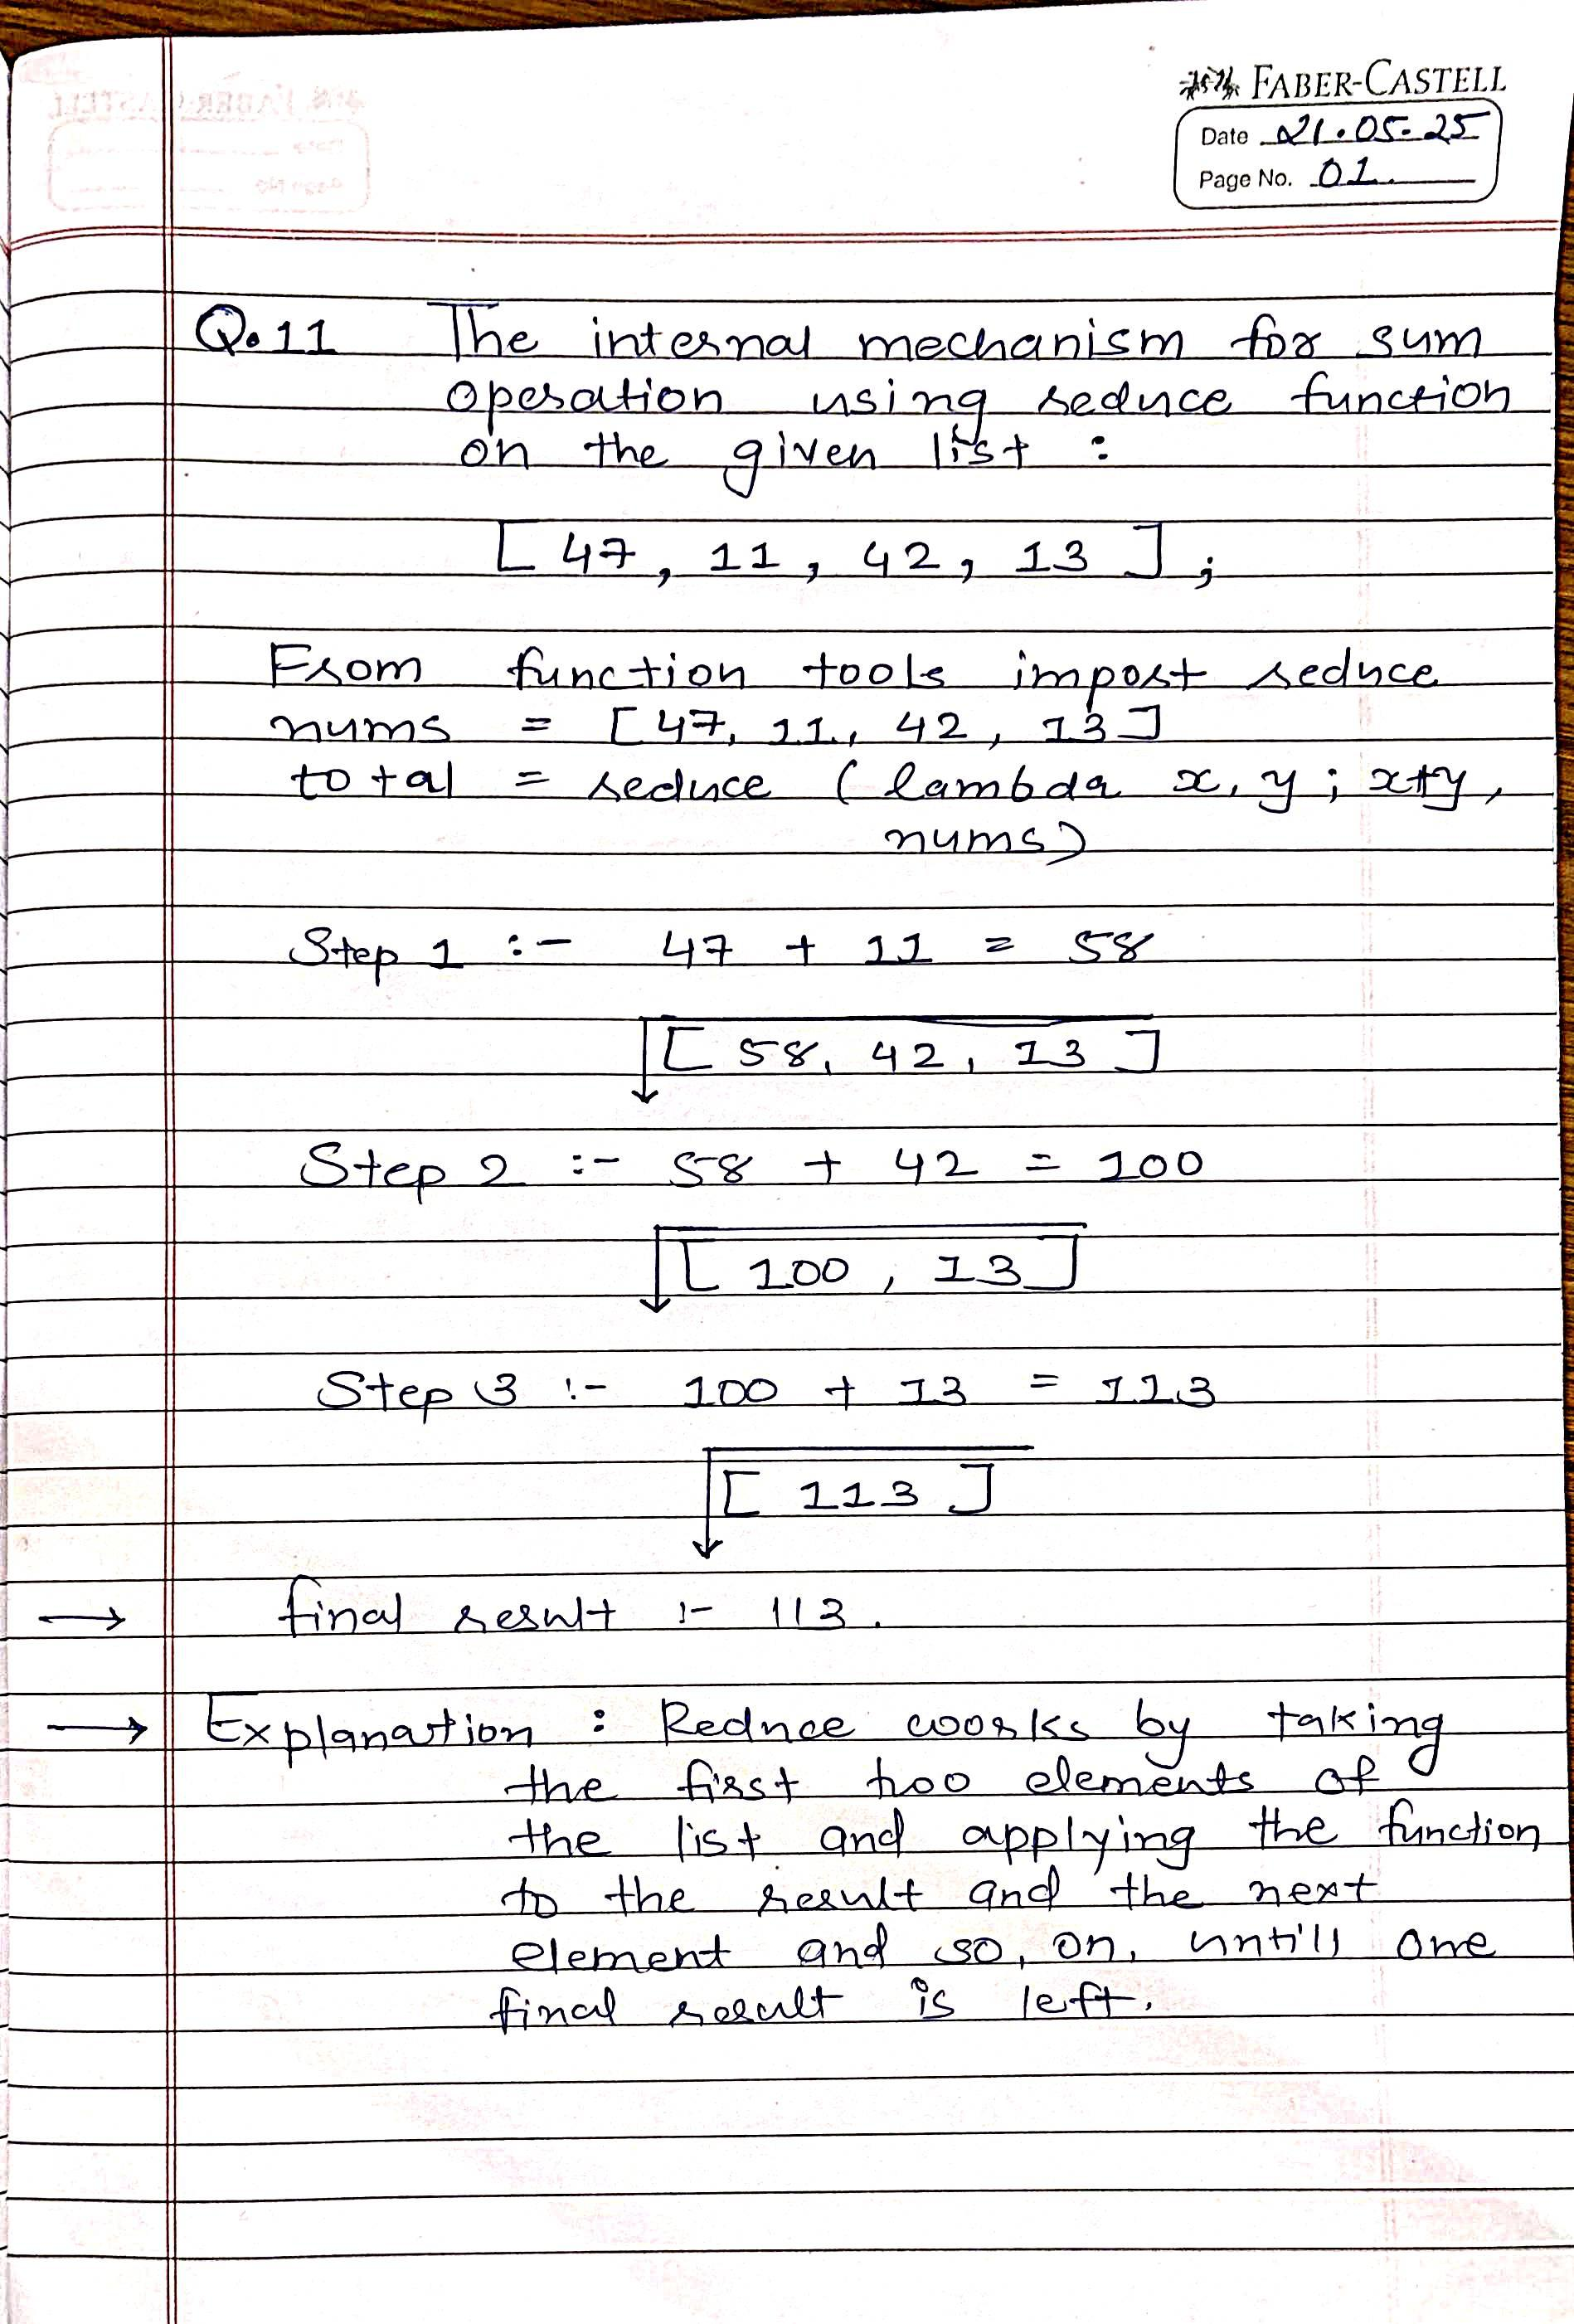

#### Explanation Summary:

-> reduce works by taking the first two elements of the list and applying the function (in this case, lambda x, y: x + y), then it applies the same function to the result and the next element, and so on, until one final result is left.

# Practical Questions & Answers

In [10]:
#1. Write a Python function that takes a list of numbers as input and returns the sum of all even numbers in 
#the list.

def sum_of_even_numbers(numbers):
    return sum(num for num in numbers if num %2==0)

lis=[1,2,3,4,5,6,7,8,9,10]
sum_of_even_numbers(lis)

30

In [11]:
 #2. Create a Python function that accepts a string and returns the reverse of that string.

def reverse_string(s):
    return s[::-1]

str1="hello world"
reverse_string(str1)

'dlrow olleh'

In [13]:
#3. Implement a Python function that takes a list of integers and returns a new list containing the squares of 
#each number

def square_of_numbers(numbers):
    return [num**2 for num in numbers]

lis1=[1,2,3,4,5,6]
square_of_numbers(lis1)

[1, 4, 9, 16, 25, 36]

In [18]:
#4.Write a Python function that checks if a given number is prime or not from 1 to 200.

def is_prime(n):
    if n<2:
        return False
    for i in range(2,n):
        if n%i == 0:
            return False
    return True

for number in range(1,201):
    if is_prime(number):
        print(number,end = ' , ')


2 , 3 , 5 , 7 , 11 , 13 , 17 , 19 , 23 , 29 , 31 , 37 , 41 , 43 , 47 , 53 , 59 , 61 , 67 , 71 , 73 , 79 , 83 , 89 , 97 , 101 , 103 , 107 , 109 , 113 , 127 , 131 , 137 , 139 , 149 , 151 , 157 , 163 , 167 , 173 , 179 , 181 , 191 , 193 , 197 , 199 , 

In [19]:
#5. Create an iterator class in Python that generates the Fibonacci sequence up to a specified number of 
#terms.

class Fibonacci:
    def __init__(self, terms):
        self.terms = terms
        self.current = 0
        self.next = 1
        self.index = 0
    def __iter__(self):
        return self
    def __next__(self):
        if self.index >= self.terms:
            raise StopIteration
        result = self.current
        self.current, self.next = self.next, self.current + self.next
        self.index += 1
        return result


fib = Fibonacci(10)
for num in fib:
    print(num, end=' ')


0 1 1 2 3 5 8 13 21 34 

In [20]:
#6. Write a generator function in Python that yields the powers of 2 up to a given exponent.

def power_of_2(limit):
    for i in range(limit+1):
        yield 2 ** i

for power in power_of_2(6):
    print(power)

1
2
4
8
16
32
64


In [22]:
#7. Implement a generator function that reads a file line by line and yields each line as a string.

def read_file_line_by_line(filename):
    with open(filename, 'r') as file:
        for line in file:
            yield line.strip()

            
#for line in read_file_line_by_line("example.txt"):
   # print(line)

In [23]:
#8. Use a lambda function in Python to sort a list of tuples based on the second element of each tuple.

lis2=[(1,3),(4,3),(4,9),(6,7)]
sorted_tuples=sorted(lis2,key=lambda x:x[1])
print(sorted_tuples)

[(1, 3), (4, 3), (6, 7), (4, 9)]


In [24]:
#9. Write a Python program that uses `map()` to convert a list of temperatures from Celsius to Fahrenheit.

def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

celsius_temps = [0, 20, 37, 100]
fahrenheit_temps = list(map(celsius_to_fahrenheit, celsius_temps))
print(fahrenheit_temps)

[32.0, 68.0, 98.6, 212.0]


In [25]:
#10. Create a Python program that uses `filter()` to remove all the vowels from a given string.

def remove_vowels(s):
    vowels = "aeiouAEIOU"
    return ''.join(filter(lambda char: char not in vowels, s))

text = "Hello, World!"
result = remove_vowels(text)
print(result)


Hll, Wrld!


In [26]:
#11.Imagine an accounting routine used in a book shop. It works on a list with sublists, which look like this:
#Write a Python program, which returns a list with 2-tuples. Each tuple consists of the order number and the 
#product of the price per item and the quantity. The product should be increased by 10,- € if the value of the 
#order is smaller than 100,00 €.
#Write a Python program using lambda and map


orders = [
    [34587, "Learning Python, Mark Lutz", 4, 40.95],
    [98762, "Programming Python, Mark Lutz", 5, 56.80],
    [77226, "Head First Python, Paul Barry", 3, 32.95],
    [88112, "Einführung in Python3, Bernd Klein", 3, 24.99]
]

# Use map and lambda to compute the result
invoice = list(map(lambda order: (
    order[0],
    order[2] * order[3] if order[2] * order[3] >= 100 else order[2] * order[3] + 10
), orders))

print(invoice)

[(34587, 163.8), (98762, 284.0), (77226, 108.85000000000001), (88112, 84.97)]
